In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, log_loss
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
fertility = fetch_ucirepo(id=244)

# data (as pandas dataframes)
X = fertility.data.features
y = fertility.data.targets

# metadata
print(fertility.metadata)

# variable information
print(fertility.variables)

{'uci_id': 244, 'name': 'Fertility', 'repository_url': 'https://archive.ics.uci.edu/dataset/244/fertility', 'data_url': 'https://archive.ics.uci.edu/static/public/244/data.csv', 'abstract': '100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 100, 'num_features': 9, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['diagnosis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5Z01Z', 'creators': ['David Gil', 'Jose Girela'], 'intro_paper': {'title': 'Predicting seminal quality with artificial intelligence methods', 'authors': 'David Gil, J. L. Girela, Joaquin De Juan, M. Jose G

In [4]:
print(y.diagnosis)
y['diagnosis'] = np.where(y['diagnosis'] == 'N', 1, 0).astype(np.float64)

0     N
1     O
2     N
3     N
4     O
     ..
95    N
96    N
97    N
98    N
99    N
Name: diagnosis, Length: 100, dtype: object


<ipython-input-4-9598a9bf74ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diagnosis'] = np.where(y['diagnosis'] == 'N', 1, 0).astype(np.float64)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,random_state = 42)

In [6]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [7]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [8]:
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (9, 80)
Shape of y_train :  (1, 80)
Shape of X_test :  (9, 20)
Shape of y_test :  (1, 20)


In [9]:
def sigmoid(p):
    return 1/(1 + np.exp(-p))

In [10]:
m = X_train.shape[1]
n = X_train.shape[0]
print(m)
print(n)

80
9


In [11]:
def model(X, Y, learning_rate, epochs):

    m = X_train.shape[1]
    n = X_train.shape[0]
    W = np.zeros((n,1))
    B = 0
    cost_list = []

    for i in range(epochs):

        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)

        if(i%(epochs/10) == 0):
            print("cost after ", i, "epoch is : ", cost)

    return W, B, cost_list

In [12]:
epochs = 10000
learning_rate = 0.0015
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, epochs = epochs)
print(W)
print(B)

cost after  0 epoch is :  0.6931471805599454
cost after  1000 epoch is :  0.40641895473228634
cost after  2000 epoch is :  0.3660333338397693
cost after  3000 epoch is :  0.3533672928147586
cost after  4000 epoch is :  0.34669122783556716
cost after  5000 epoch is :  0.34196156562771035
cost after  6000 epoch is :  0.33813315904649416
cost after  7000 epoch is :  0.3348593728683805
cost after  8000 epoch is :  0.3319901767439142
cost after  9000 epoch is :  0.32944102802757924
[[-0.58414937]
 [ 0.27292562]
 [ 0.43234626]
 [ 0.54655218]
 [-0.08666445]
 [ 0.18639373]
 [ 0.57627416]
 [-0.26990754]
 [ 0.30063021]]
0.5877031652161785


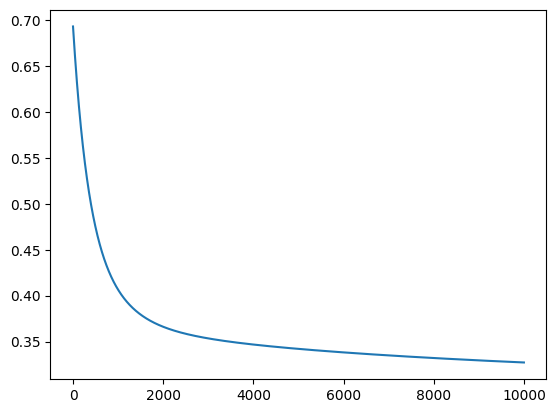

In [13]:
plt.plot(np.arange(epochs), cost_list)
plt.show()

In [14]:
def predicted_values(X, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype = 'float32')
    return A

In [15]:
y_pred = predicted_values(X_test, W, B)

In [16]:
#Calculating Accuracy
acc = (1 - np.sum(np.absolute(y_pred - y_test))/y_test.shape[1])*100
print("Accuracy of the model is : ", round(acc, 2), "%")

Accuracy of the model is :  90.0 %


In [17]:
logisticloss = (-((y_test * np.log10(y_pred)) + (1 - y_test) * np.log10(1 - y_pred)).mean())

<ipython-input-17-a32a6c54bcbf>:1: RuntimeWarning: divide by zero encountered in log10
  logisticloss = (-((y_test * np.log10(y_pred)) + (1 - y_test) * np.log10(1 - y_pred)).mean())
<ipython-input-17-a32a6c54bcbf>:1: RuntimeWarning: invalid value encountered in multiply
  logisticloss = (-((y_test * np.log10(y_pred)) + (1 - y_test) * np.log10(1 - y_pred)).mean())


In [18]:
print(y_test)
print(y_pred)

[[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [19]:
# From printed values
TP = 18
FP = 2
FN = 0
TN = 0

In [20]:
#The precision is the ratio tp / (tp + fp)
precision = TP/(TP+FP)
print(precision)
#The recall is the ratio tp / (tp + fn)
recall = TP/(TP+FN)
print(recall)
#F1 Score is 2* (Precision * recall)/(precision + recall)
F1_Score = 2*(precision * recall)/(precision + recall)
print(F1_Score)

0.9
1.0
0.9473684210526316


In [21]:
#Let's test accuracy with importing model from sklearn

f = np.array(X)
h = np.array(y.diagnosis)
f_train, f_test, h_train, h_test = train_test_split(f, h, test_size =0.2,random_state = 42)

In [22]:
logreg = LogisticRegression()
logreg.fit(f_train,h_train)
h_pred = logreg.predict(f_test)

In [23]:
print(classification_report(h_test, h_pred))
print(confusion_matrix(h_test, h_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20

[[ 0  2]
 [ 0 18]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(h_test, h_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.5


In [25]:
# Calculating Log Loss
logloss = log_loss(h_test, h_pred)
print(f'Log Loss: {logloss}')

Log Loss: 3.604365338911715


In [26]:
df = pd.DataFrame(data= fertility.data.features, columns=fertility.feature_names)
df

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50
...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50
96,-1.00,0.61,1,0,0,0,0.8,0,0.50
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31
98,-1.00,0.64,1,0,1,0,1.0,0,0.19


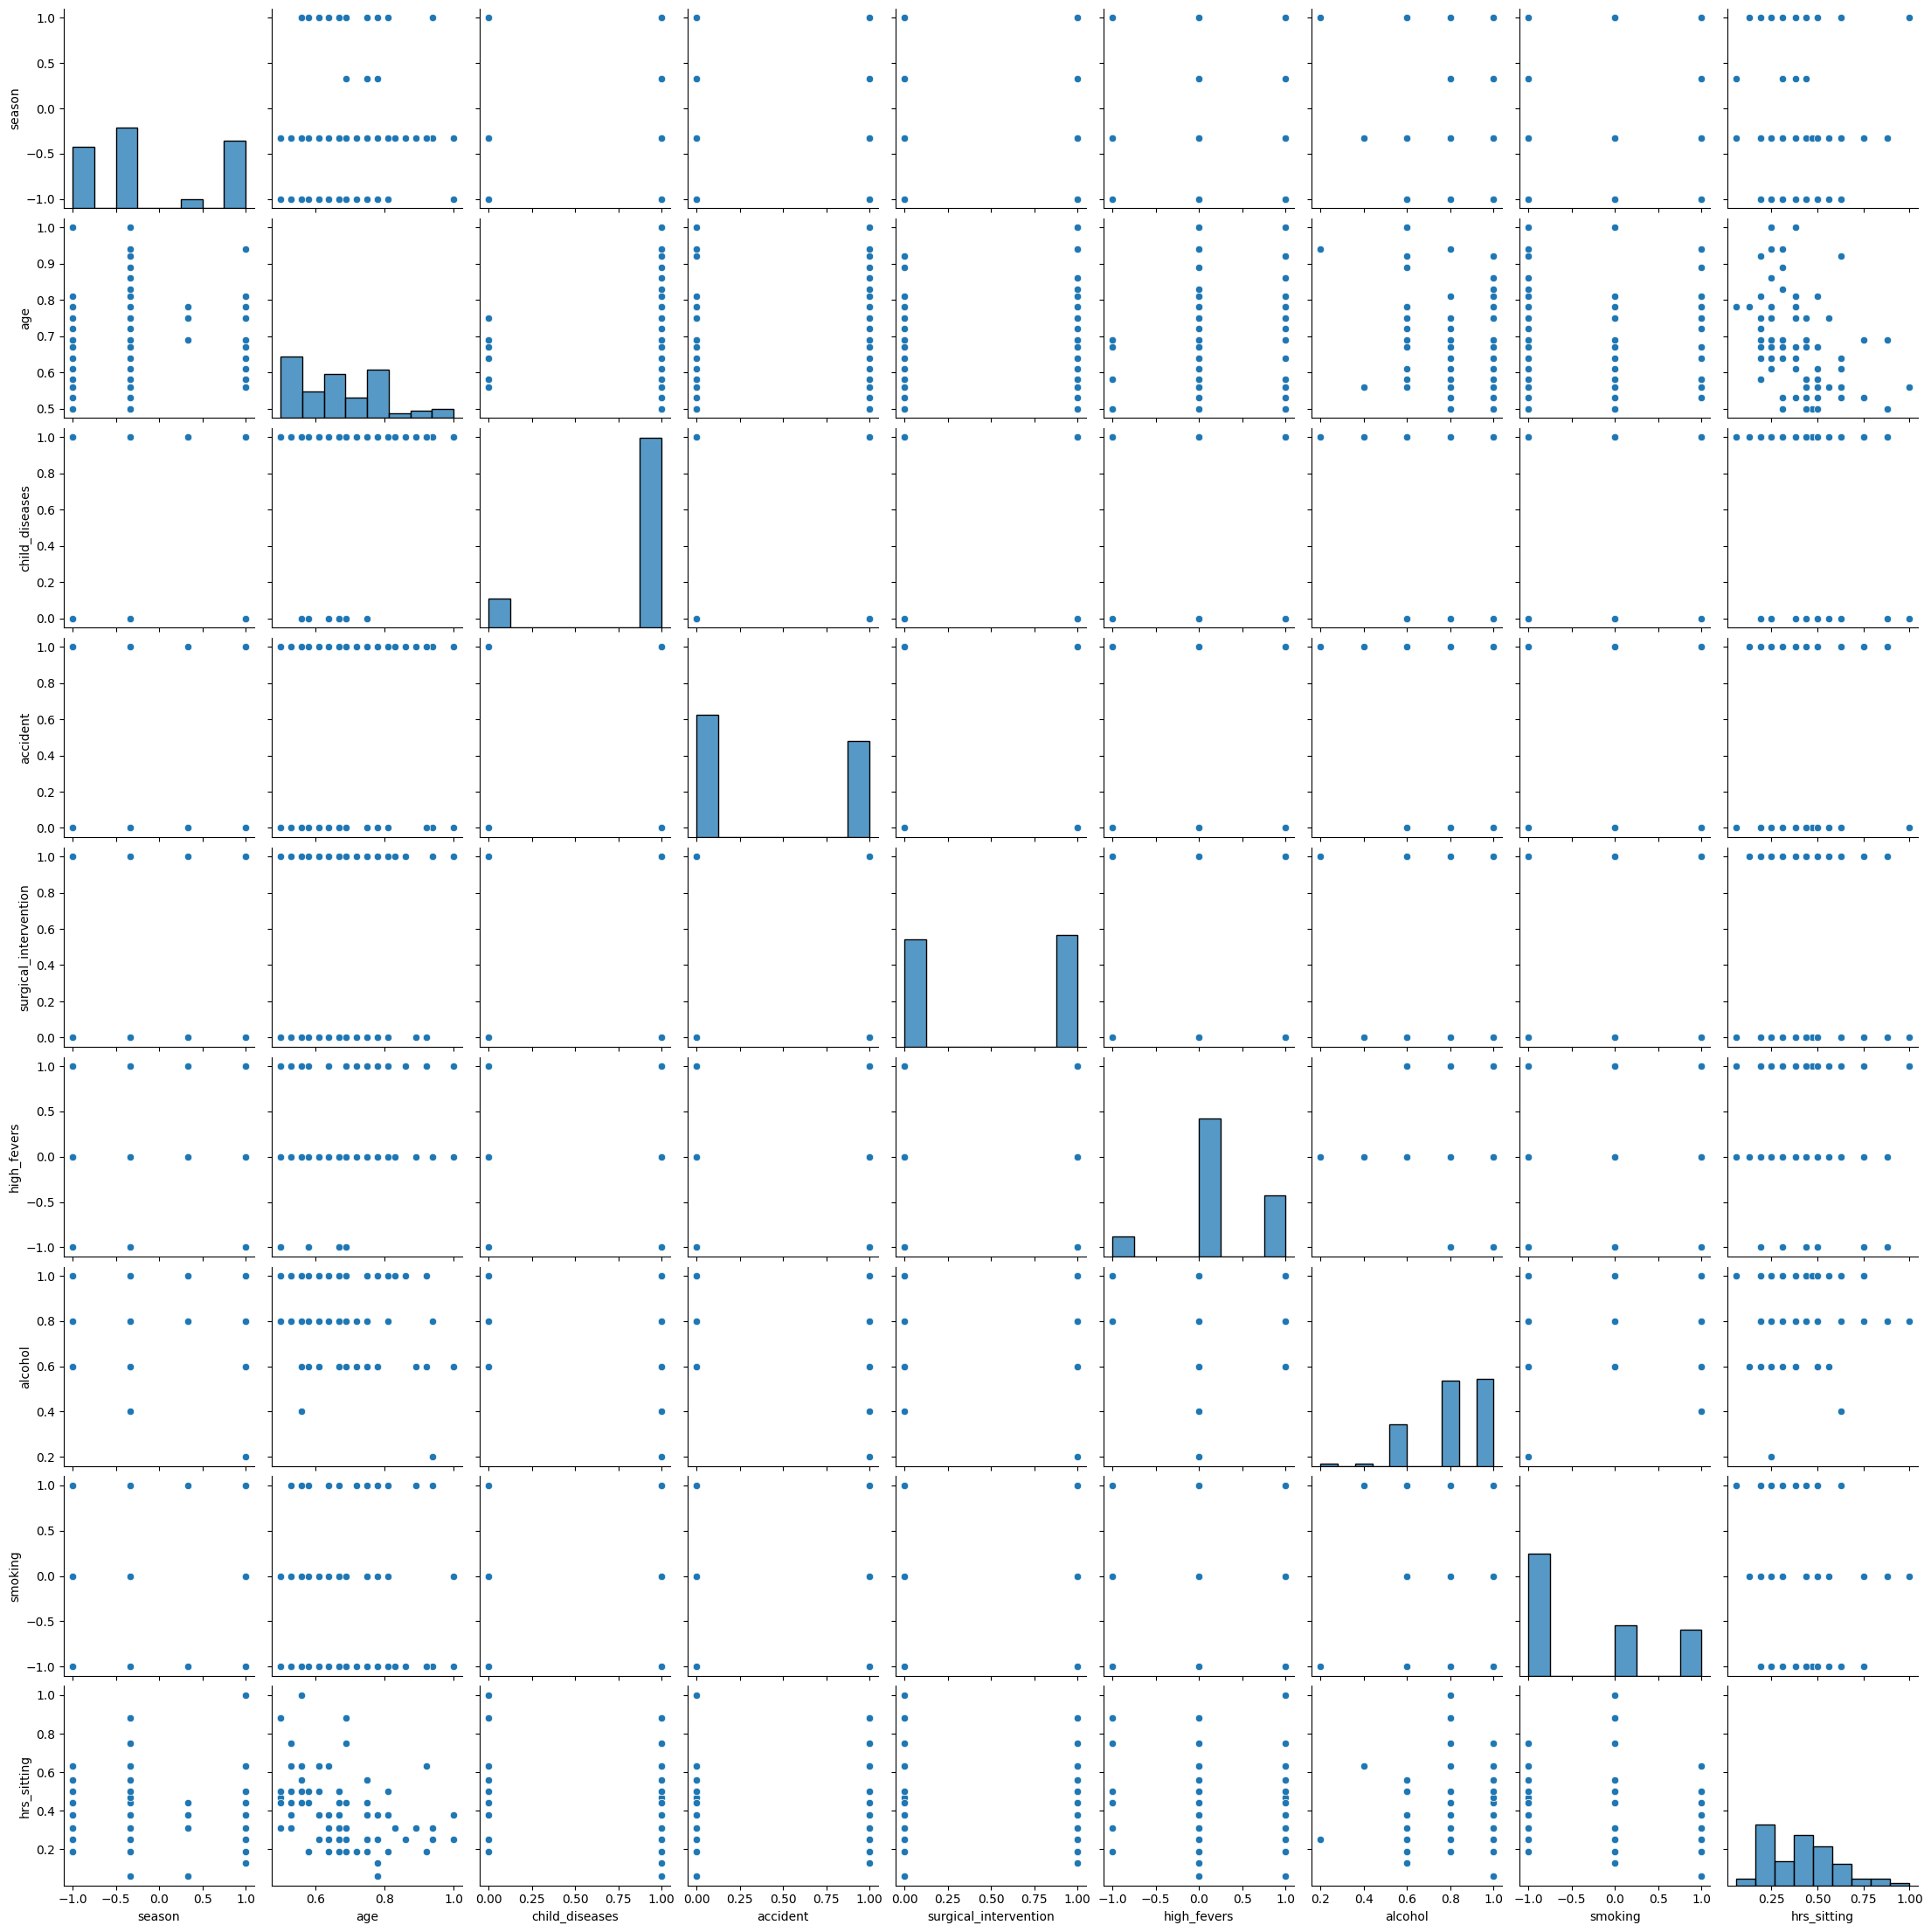

In [27]:
import seaborn as sns
sns.pairplot(df)
plt.show()


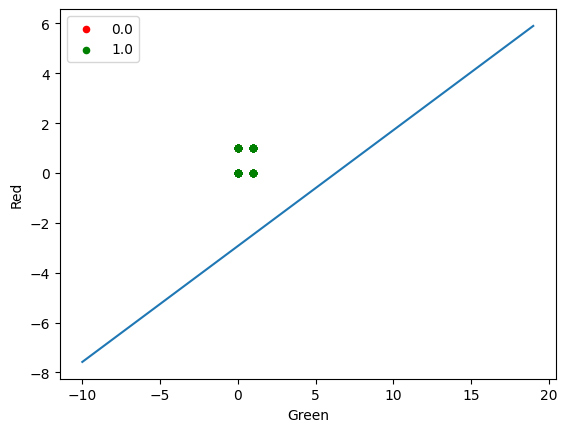

In [28]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)

def my_formula(x):
    return (-W[3]-W[4]*x)/W[5]

from pandas import DataFrame
df = DataFrame(dict(x=f[:,3], y=f[:,4], label=h))
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-10,20))
plt.xlabel('Green')
plt.ylabel('Red')
plt.show()

In [29]:
#e1.Measuring Model Performance:
   #Accuracy: Measures the overall correctness of the model's predictions.
   #Confusion Matrix: Provides a breakdown of the model's predictions in terms of true positive, false positive, true negative, and false negative.
   #Precision: Measures the proportion of true positive predictions among all positive predictions made by the model.
   #Recall (Sensitivity): Measures the proportion of true positive predictions among all actual positive instances in the data.
   #F1 Score: Harmonic mean of precision and recall, providing a balanced measure of the model's performance.
   #ROC Curve & AUC: ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings. AUC (Area Under the ROC Curve) quantifies the overall performance of the model across all threshold settings.
   #Log Loss: Measures the performance of a classification model where the predicted output is a probability value between 0 and 1.

#e2.
   #Accuracy: Ratio of correctly predicted observations to the total observations.
   #Confusion Matrix: Table used to describe the performance of a classification model, showing the counts of true positive, false positive, true negative, and false negative predictions.
   #Precision: Ratio of true positive predictions to the total positive predictions made by the model.
   #Recall (Sensitivity): Ratio of true positive predictions to the total actual positive instances in the data.
   #F1 Score: Harmonic mean of precision and recall, providing a balanced measure of the model's performance.
   #ROC Curve (Receiver Operating Characteristic Curve): Graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied, showing the trade-off between true positive rate and false positive rate.
   #AUC (Area Under the ROC Curve): Metric that quantifies the overall performance of a binary classification model across all possible thresholds.
   #Log Loss: Evaluation metric used to quantify the accuracy of a classification model's predictions, especially when the model outputs probabilities. It measures the performance of a classification model where the predicted output is a probability value between 0 and 1.